# Porto Seguro's Safe Driver Prediction

# 1. Data Preparation and Explotaration

링크 : https://www.kaggle.com/bertcarremans/data-preparation-explorationc

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('data/porto_train.csv')
test = pd.read_csv('data/porto_test.csv')

In [3]:
print(train.shape)
train.head()

(595212, 59)


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [5]:
print(test.shape)
test.head()

(892816, 58)


,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


In [6]:
data = []

for feature in train.columns:
    if feature == 'target':
        use = 'target'
    elif feature == 'id':
        use = 'id'
    else:
        use = 'input'
        
    if 'bin' in feature or feature == 'target':
        type = 'binary'
    elif 'cat' in feature or feature == 'id':
        type = 'nominal'
    elif train[feature].dtype == float or isinstance(train[feature].dtype, float): # train[feature].dtpye이 float이면 True
        type = 'interval'
    else:
        type = 'ordinal'
    
    keep = True
    if feature == 'id':
        keep = False
    
    dtype = train[feature].dtype
    
    feature_dictionary = {
        'varname' : feature,
        'role' : use,
        'level' : type,
        'keep' : keep,
        'dtype' : dtype,
    }
    
    data.append(feature_dictionary)
    
meta = pd.DataFrame(data, columns = ['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace = True)
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [7]:
v = meta[(meta['level'] == 'nominal') & (meta['keep'])].index
v

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [8]:
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['level'].agg('count')})

count
role   level          
id     nominal       1
input  binary       17
       interval     10
       nominal      14
       ordinal      16
target binary        1

## Descriptive statistics

### Interval variables

In [9]:
v = meta[(meta['level'] == 'interval') & (meta['keep'])].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


### Ordinal variables

In [10]:
v = meta[(meta['level'] == 'ordinal') & (meta['keep'])].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


### Binary variables

In [11]:
v = meta[(meta['level'] == 'binary') & (meta['keep'])].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Target data is 3.645%, which is strongly imbalanced.

## Handling imbalanced classes

undersampling은 다른 클래스에 비해 상대적으로 많이 나타나있는 클래스의 개수를 줄이는 것입니다. 

이를 통해 균형을 유지할 수 있게 되지만, 제거하는 과정에서 유용한 정보가 버려지게 되는 것이 큰 단점입니다. 

oversampling은 데이터를 복제하는 것입니다. 무작위로 하는 경우도 있고, 기준을 미리 정해서 복제하는 방법도 있습니다.

정보를 잃지 않고, 훈련용 데이터에서 높은 성능을 보이지만 실험용 데이터에서의 성능은 낮아질 수 있습니다. 

대부분의 oversampling 방법은 Overfitting의  문제를 포함하고 있습니다.

In [12]:
desired_apriori = 0.10

# target 값에 따라 index를 구함
idx_0= train[train['target'] == 0].index
idx_1 = train[train['target'] == 1].index


nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

undersampling_rate = ((1 - desired_apriori) * nb_1) / (nb_0 * desired_apriori)
undersampled_nb_0 = int(undersampling_rate * nb_0)

print('Rate to undersample records with target = 0: {}'.format(undersampling_rate))
print('Number of undersampled records: {}'.format(undersampled_nb_0))

# Randomly select records
undersampled_idx = shuffle(idx_0, random_state = 37, n_samples = undersampled_nb_0)

idx_list = list(undersampled_idx) + list(idx_1)

train = train.loc[idx_list].reset_index(drop = True)

Rate to undersample records with target = 0: 0.34043569687437886
Number of undersampled records: 195246


## Data Quality checks

### Checking missing values

In [13]:
vars_with_missing = []

for feature in train.columns:
    missings = train[train[feature] == -1][feature].count()
    
    if missings > 0:
        vars_with_missing.append(feature)
        missing_percent = missings / train.shape[0]
        
        print('Variable {} has {} records {: .2%} with missing values'.format(feature, missings ,missing_percent))

Variable ps_ind_02_cat has 103 records  0.05% with missing values
Variable ps_ind_04_cat has 51 records  0.02% with missing values
Variable ps_ind_05_cat has 2256 records  1.04% with missing values
Variable ps_reg_03 has 38580 records  17.78% with missing values
Variable ps_car_01_cat has 62 records  0.03% with missing values
Variable ps_car_02_cat has 2 records  0.00% with missing values
Variable ps_car_03_cat has 148367 records  68.39% with missing values
Variable ps_car_05_cat has 96026 records  44.26% with missing values
Variable ps_car_07_cat has 4431 records  2.04% with missing values
Variable ps_car_09_cat has 230 records  0.11% with missing values
Variable ps_car_11 has 1 records  0.00% with missing values
Variable ps_car_14 has 15726 records  7.25% with missing values


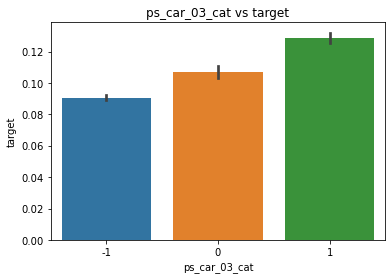

In [14]:
sns.barplot(data = train, x = 'ps_car_03_cat', y = 'target')
plt.title('ps_car_03_cat vs target', fontsize = 12)

plt.show()

Text(0.5, 1.0, 'ps_car_05_cat vs target')

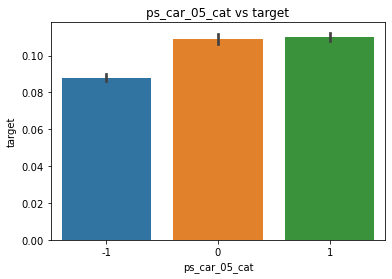

In [15]:
sns.barplot(data = train, x = 'ps_car_05_cat', y = 'target')
plt.title('ps_car_05_cat vs target', fontsize = 12)

In [16]:
# Drop two columns
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']

train.drop(vars_to_drop, axis = 1, inplace = True)
meta.loc[(vars_to_drop), 'keep'] = False

# Imputing with the mea or mode

mean_imp = SimpleImputer(missing_values= -1, strategy= 'mean')
mode_imp = SimpleImputer(missing_values= -1, strategy= 'most_frequent')

train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()

### Checking the cardinality of the categorical variables

In [17]:
v = meta[(meta['level'] == 'nominal') & (meta['keep'])].index

for feature in v:
    dist_value = train[feature].nunique()
    print('Variable {} has {} distinct values'.format(feature, dist_value))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


#### encoding

https://dailyheumsi.tistory.com/120

In [18]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [19]:
train_encoded, test_encoded = target_encode(train['ps_car_11_cat'], 
                                            test['ps_car_11_cat'],
                                            target = train['target'], 
                                            min_samples_leaf = 100,
                                            smoothing = 10, 
                                            noise_level = 0.01)

train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis = 1, inplace = True)
meta.loc['ps_car_11_cat', 'keep'] = False

test['ps_car_11_cat_tes'] = test_encoded
test.drop('ps_car_11_cat', axis =1, inplace = True)

## EDA

In [20]:
v = meta[(meta['level'] == 'nominal') & (meta['keep'])].index

def plot_categorical(data):
    for feature in data:
        plt.figure
        fig, ax = plt.subplots(figsize = (20,10))

        cat_percent = train[[feature, 'target']].groupby(feature, as_index = False).mean()
        cat_percent.sort_values('target', ascending = False, inplace = True)
        cat_size = train[feature].value_counts().reset_index(drop = False)
        cat_size.columns = [feature, 'count']

        cat_percent = cat_percent.merge(cat_size, on=feature, how='left')

        sns.barplot(ax = ax, x = feature, y = 'target', data = cat_percent, order = cat_percent[feature])
        
   # for i, p in enumerate(ax.patches):
     #   ax.annotate('{}'.format(cat_percent['count'].values[i], (p.get_width(), p.get_y() + 0.5), fontsize = 20))    
        
    plt.show()

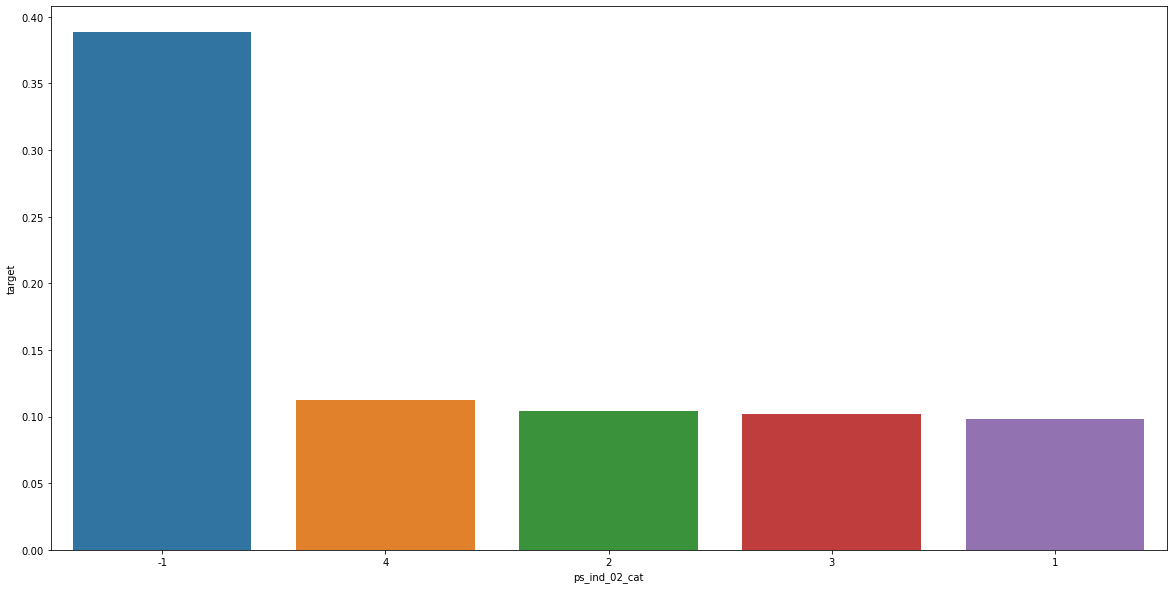

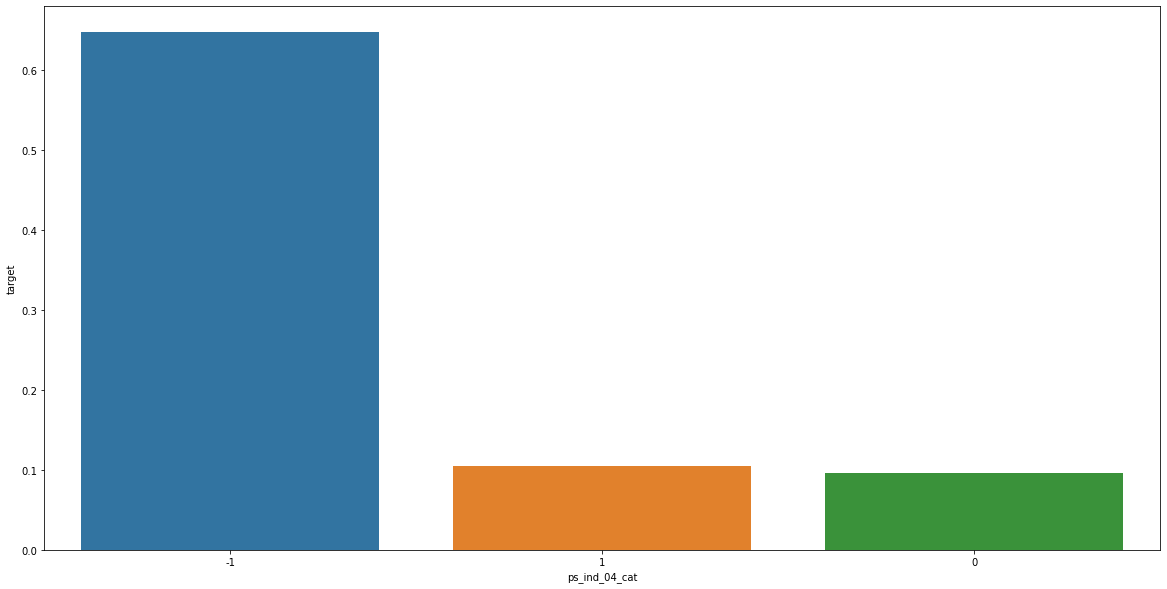

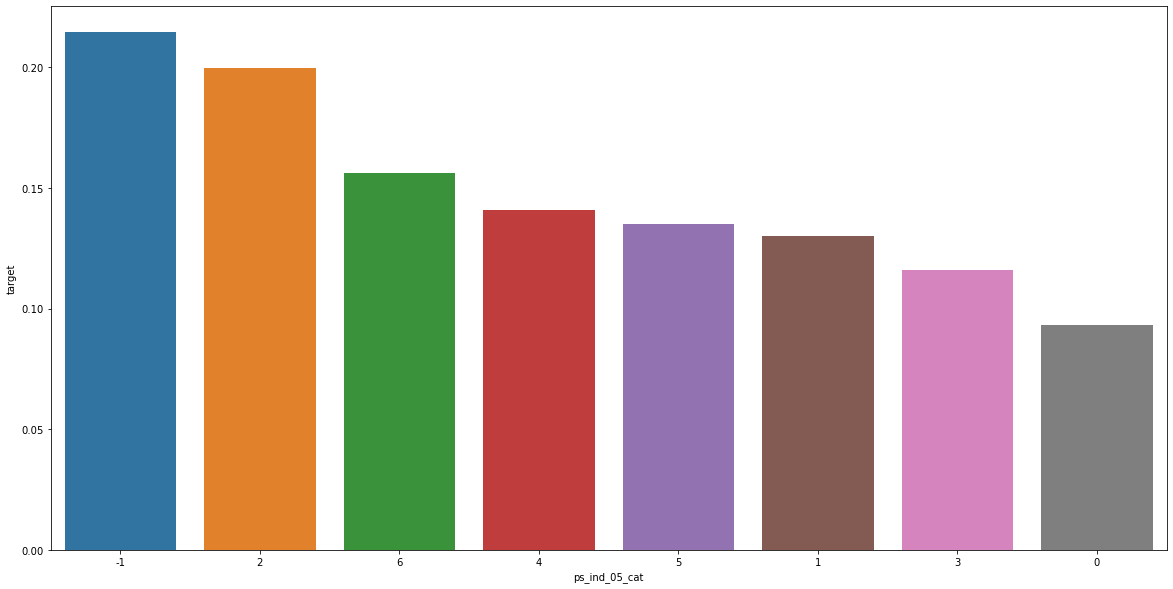

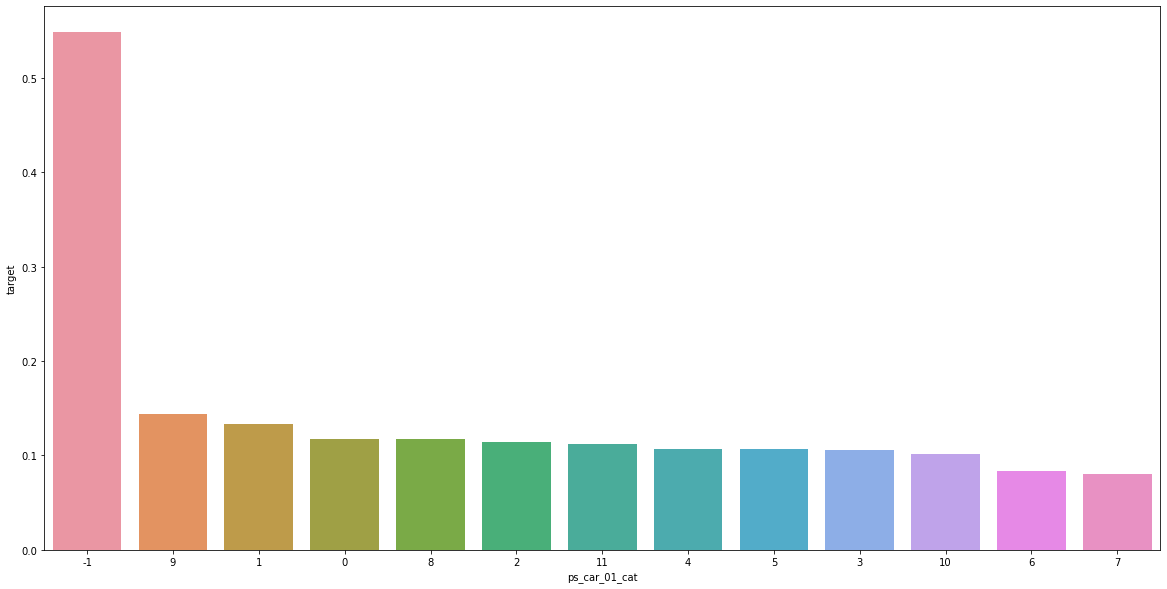

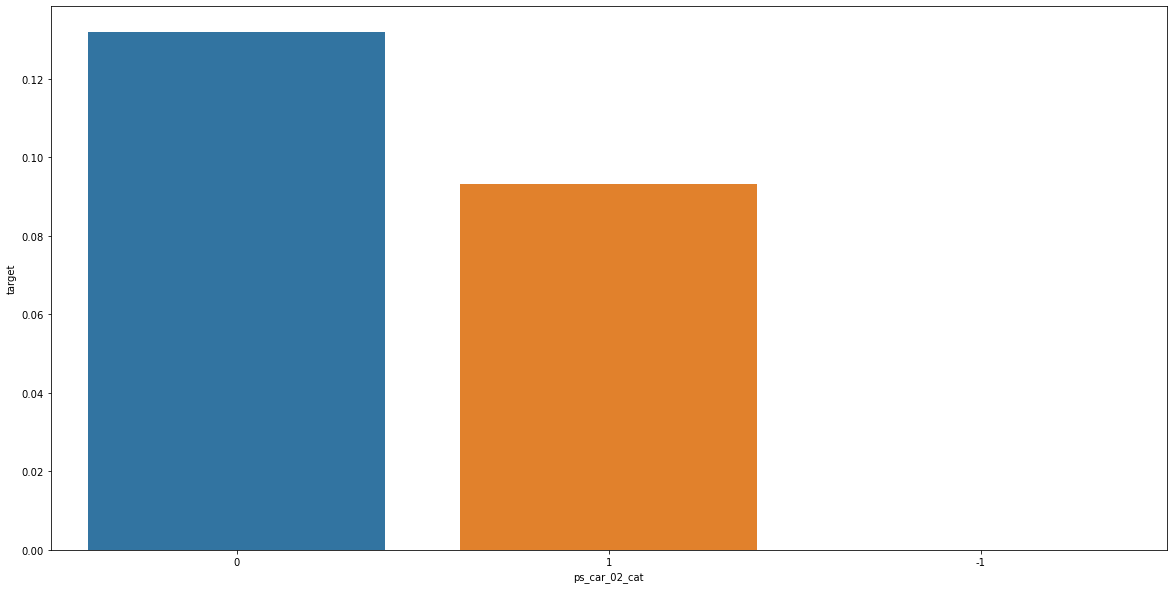

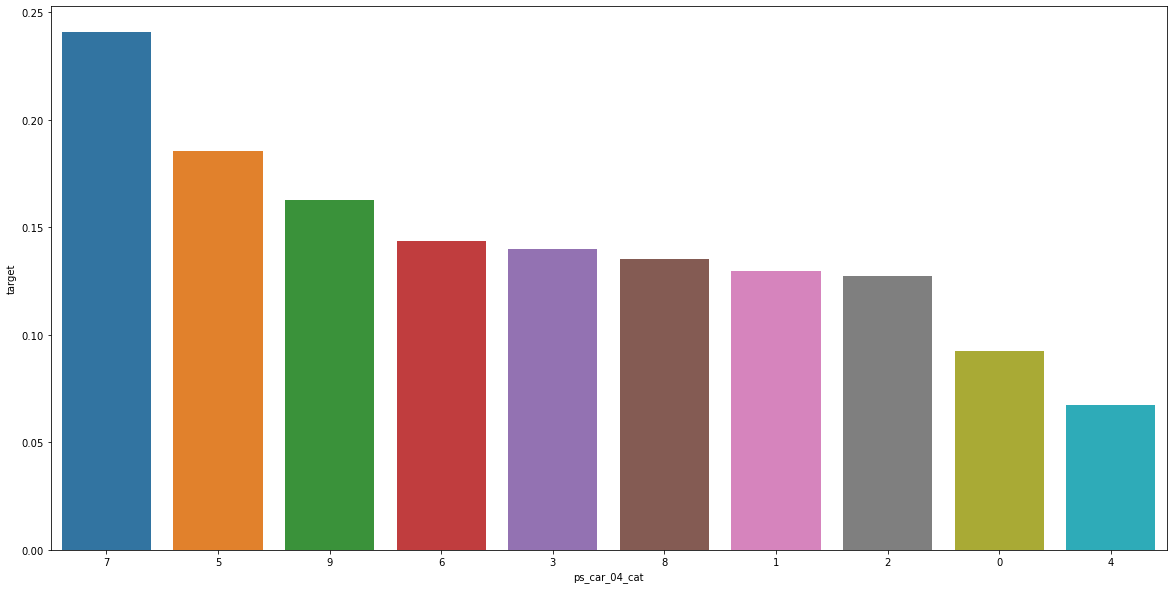

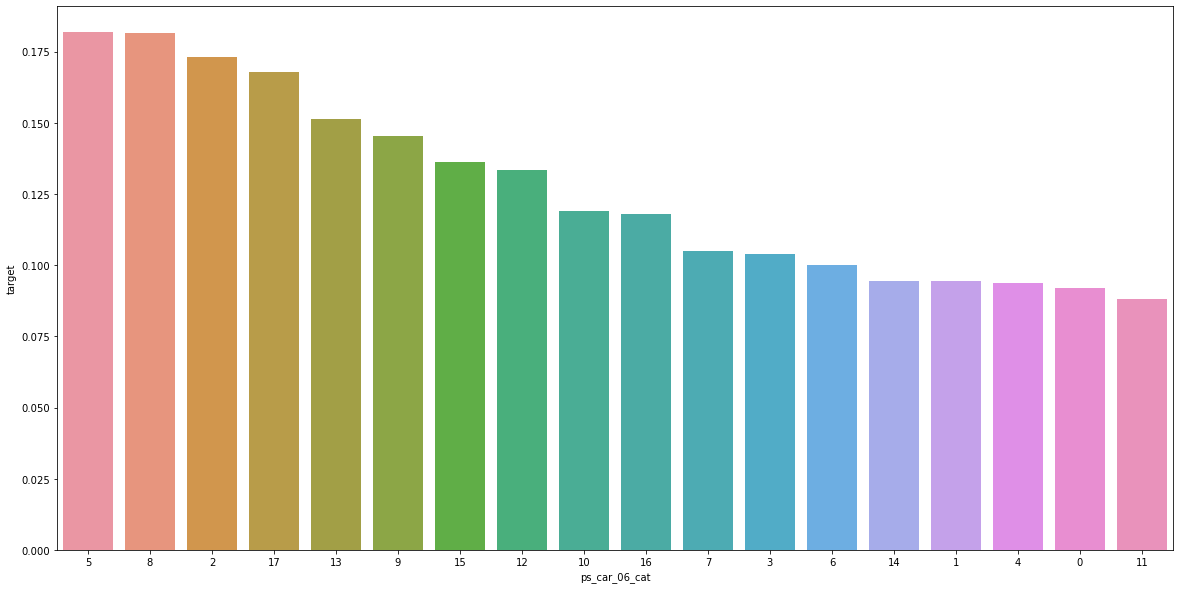

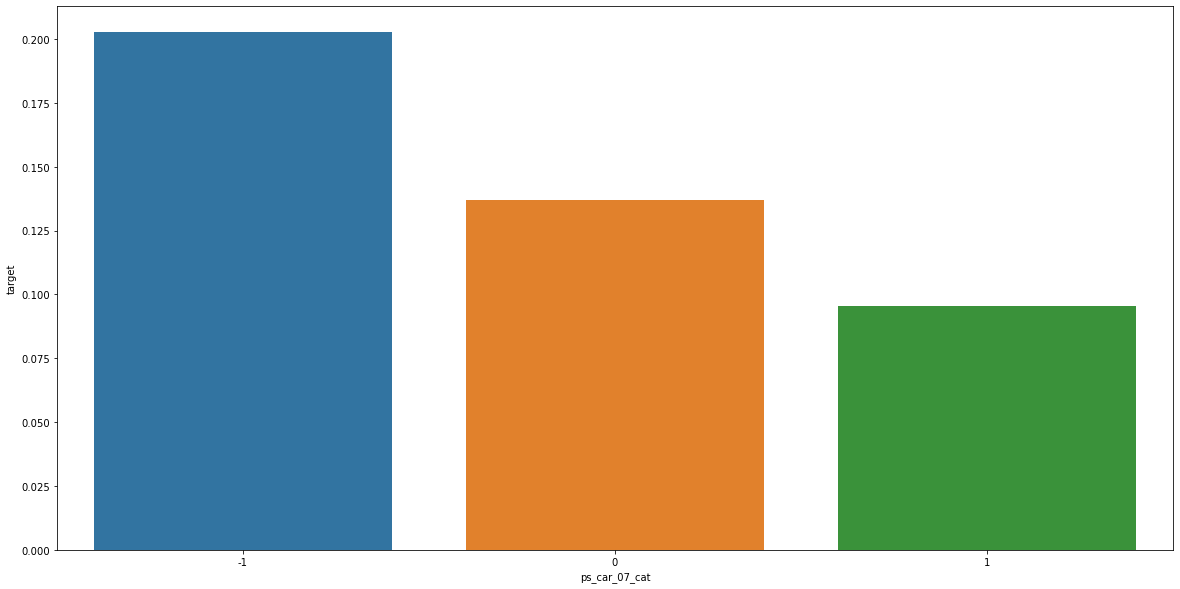

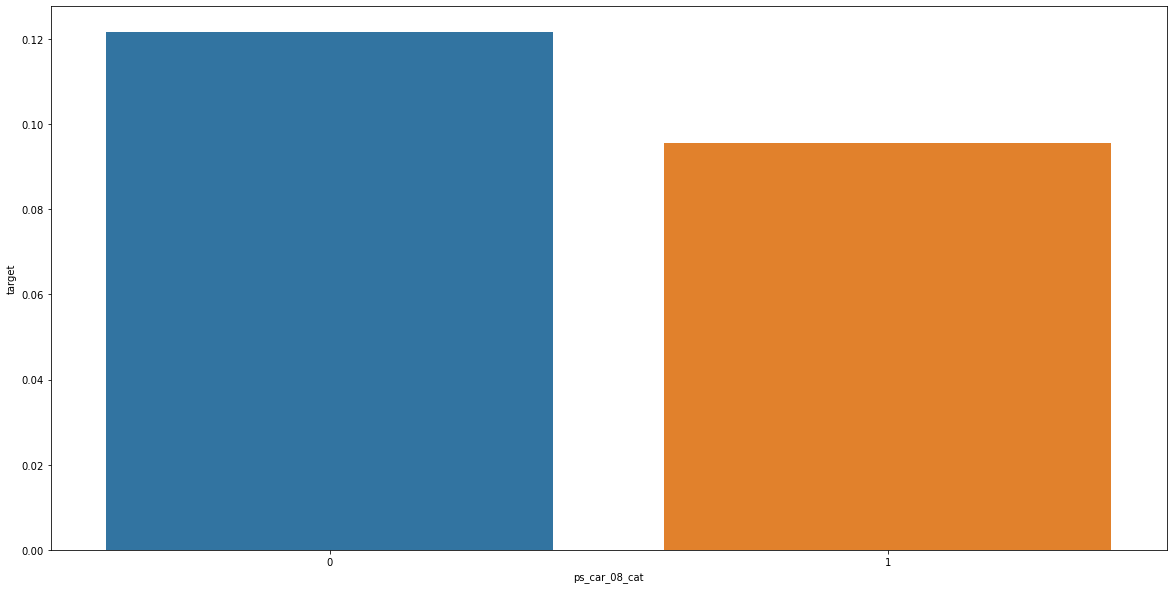

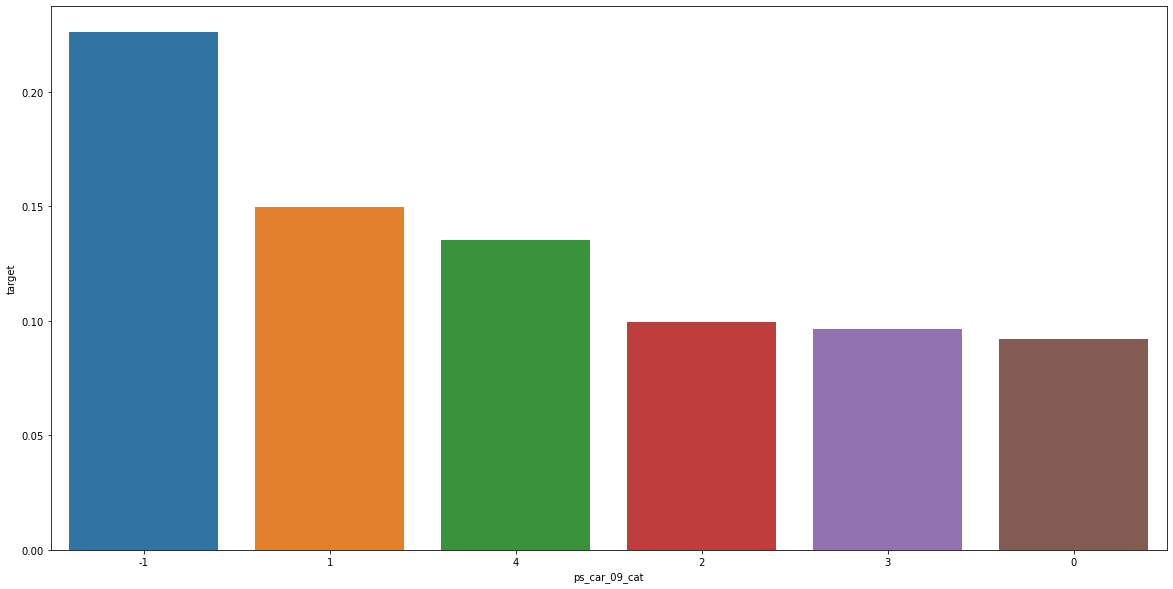

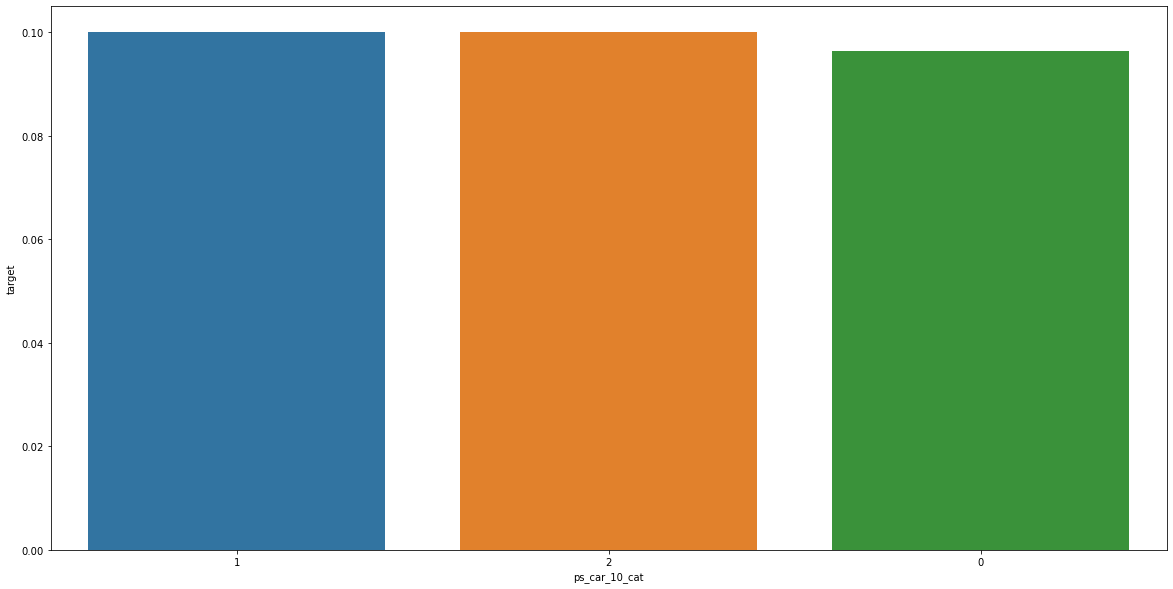

In [21]:
plot_categorical(train[v])

### Interval variables

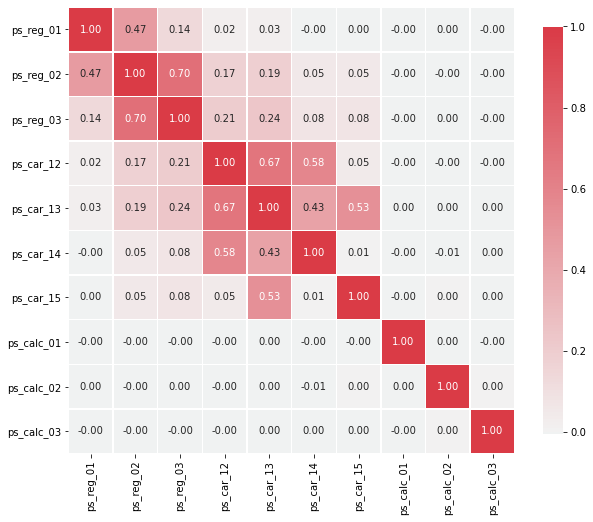

In [24]:
def corr_heatmap(v):
    correlations = train[v].corr()

    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show();
    
v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

#### ps_reg_02 and ps_reg_03

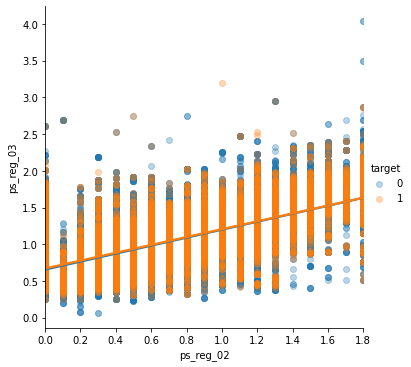

In [28]:
sns.lmplot(data = train, x = 'ps_reg_02', y = 'ps_reg_03', hue = 'target', scatter_kws = {'alpha' : 0.3})

#### ps_car_12 and ps_car_13

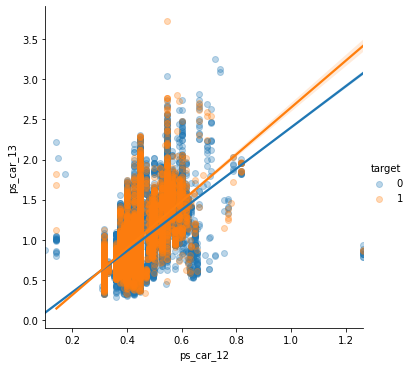

In [30]:
sns.lmplot(data = train, x = 'ps_car_12', y = 'ps_car_13', hue = 'target', scatter_kws = {'alpha' : 0.3})

### Checking the correltations between ordinal variables

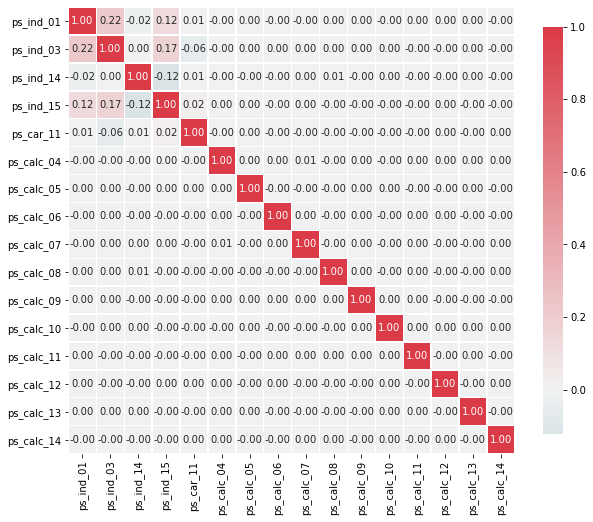

In [31]:
v = meta[(meta['level'] == 'ordinal') & (meta['keep'])].index
corr_heatmap(v)

## Feature Enginerring

### Creating dummy variables

In [33]:
v = meta[(meta['level'] == 'nominal') & (meta['keep'])].index
print('Before dummification we have {} variables in train'.format(train.shape[1]))
train = pd.get_dummies(train, columns = v, drop_first = True)
print('After dumminfication we have {} variables in train'.format(train.shape[1]))

Before dummification we have 57 variables in train
After dumminfication we have 109 variables in train


### Creating interaction variables

In [34]:
v = meta[(meta['level'] == 'interval') & (meta['keep'])].index

poly = PolynomialFeatures(degree = 2, interaction_only = False, include_bias = False)
interactions = pd.DataFrame(data = poly.fit_transform(train[v]), columns = poly.get_feature_names(v))
interactions.drop(v, axis = 1, inplace = True)

print('Before creating interactions we have {} variables in train'.format(train.shape[1]))
train = pd.concat([train, interactions], axis = 1)
print('After creating interactions we have {} variables in train'.format(train.shape[1]))

Before creating interactions we have 109 variables in train
After creating interactions we have 164 variables in train


## Feature selection

### Removing feature with low or zero variance

In [51]:
selector = VarianceThreshold(threshold=0.01)
selector.fit(train.drop(['id', 'target'], axis = 1))

v = train.drop(['id', 'target'], axis = 1).columns[~selector.get_support()]
print('{} variables have too low variance'.format(len(v)))
print('\nThese variables are {}'.format(list(v)))

28 variables have too low variance

These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


### Selecting features with a Random Forest and SelectFromModel

In [ ]:
X_train = train.drop(['id', 'target'], axis = 1)
y_train = train['target']

rf = RandomForestClassifier(n_estimators=100, random_state = 0, n_jobs = -1)

rf.fit(X_train, y_train)
importances = rf.feature_importances_

<AxesSubplot:>

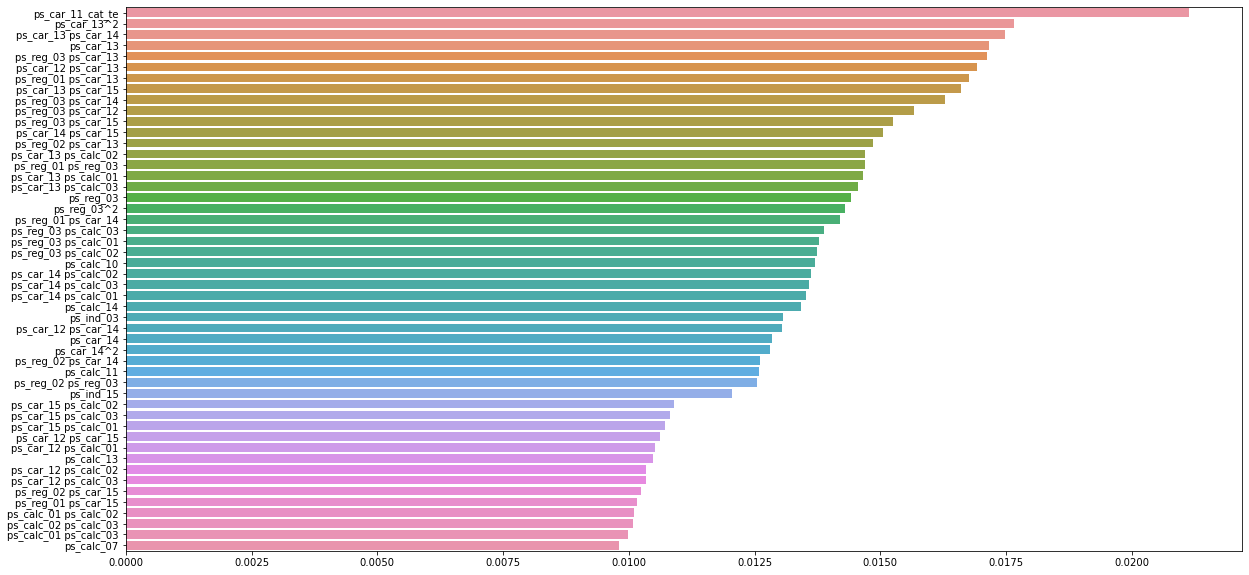

In [57]:
plt.figure(figsize = (20,10))

importances = pd.Series(importances, index = X_train.columns)
importances = importances.sort_values(ascending = False)[:50]
sns.barplot(x = importances.values, y = importances.index)

In [59]:
sfm = SelectFromModel(rf, threshold= 'median', prefit = True)
print('Number of features before selection : {}'.format(X_train.shape[1]))

n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection {}'.format(n_features))
selected_vars = list(X_train.columns[sfm.get_support()])

Number of features before selection : 162
Number of features after selection 81


In [60]:
train = train[selected_vars + ['target']]

## Feature Scaling

In [63]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'], axis = 1))

array([[-0.45941104, -1.26665356,  1.05087653, ..., -0.72553616,
        -1.01071913, -1.06173767],
       [ 1.55538958,  0.95034274, -0.63847299, ..., -1.06120876,
        -1.01071913,  0.27907892],
       [ 1.05168943, -0.52765479, -0.92003125, ...,  1.95984463,
        -0.56215309, -1.02449277],
       ...,
       [-0.9631112 ,  0.58084336,  0.48776003, ..., -0.46445747,
         0.18545696,  0.27907892],
       [-0.9631112 , -0.89715418, -1.48314775, ..., -0.91202093,
        -0.41263108,  0.27907892],
       [-0.45941104, -1.26665356,  1.61399304, ...,  0.28148164,
        -0.11358706, -0.72653353]])